# KNN - K Nearest Neighbors

KNN ou K vizinhos mais próximos é um algoritmo de classificação muito simples. Ele classifica um ponto desconhecido utilizando como base as classificaçõe dos K pontos vizinhos mais próximos.

Para exemplificar, utilizaremos o dataset público wine, disponível no próprio sklearn.

#### Passo 0: Import Libs

In [38]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#### Passo1: Abertura dos dados

In [39]:
dados = datasets.load_wine()
dataframe = pd.DataFrame(data=dados.data,columns=dados.feature_names)
dataframe['classe'] = dados.target

Amostra dos dados:

In [40]:
dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classe
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Quantas classes direfentes temos:

In [41]:
dataframe['classe'].value_counts()

1    71
0    59
2    48
Name: classe, dtype: int64

#### Passo 2: Aplicando KNN com k = 5

In [45]:
X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Verificando a acurácia por meio da matriz de confusão:

In [46]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5  1  1]
 [ 0 11  4]
 [ 1  7  6]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.58      0.73      0.65        15
           2       0.55      0.43      0.48        14

    accuracy                           0.61        36
   macro avg       0.65      0.63      0.63        36
weighted avg       0.62      0.61      0.61        36



Aplicamos o algoritmo de KNN com K = 5 e os resultados são mostrados acima. 
Será que podemos melhorar a acurácia desse modelo? Como sabemos qual o melhor valor para K?

#### Passo 3: Identificando o melhor K

Para identificar o melhor K, vamos aplicar o algoritmo para um range e encontrar o k que produz o melhor erro

In [47]:
erro = []

# Vamos aplicar valores de K de 1 a 100 
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    erro.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro')

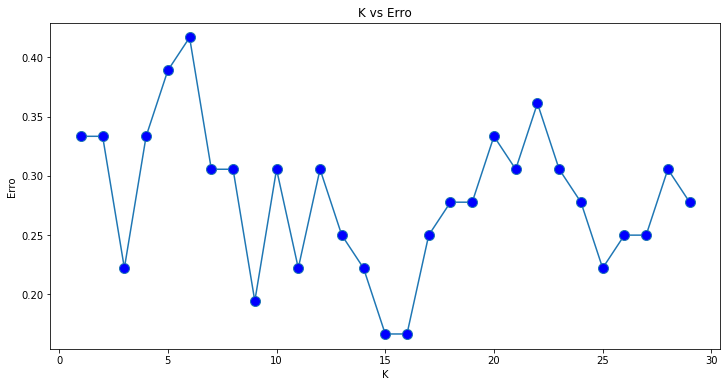

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), erro, marker='o',markerfacecolor='blue', markersize=10)
plt.title('K vs Erro')
plt.xlabel('K')
plt.ylabel('Erro')

Por meio do gráfico mostrado acima, vemos que um valor de K mais interessante, seria o K=15. Vamos reaplicar o algoritmo com esse parâmetro:

In [49]:
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  1]
 [ 0 14  1]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.78      0.93      0.85        15
           2       0.83      0.71      0.77        14

    accuracy                           0.83        36
   macro avg       0.87      0.83      0.85        36
weighted avg       0.84      0.83      0.83        36



Vale notar que quanto menor o K, mais flexível o modelo se torna. Isso pode gerar um modelo com low bias e alta variância.
Um modelo com K muito alto, por sua vez, torna o modelo mais rígido, fazendo com que a fronteira que delimita as classes se aproxime de uma reta.

#### Passo 4: Mostrando a fronteira delimitadora

Para consguirmos plotar a fronteira, vamos considerar apenas as duas primeiras colunas dos dados

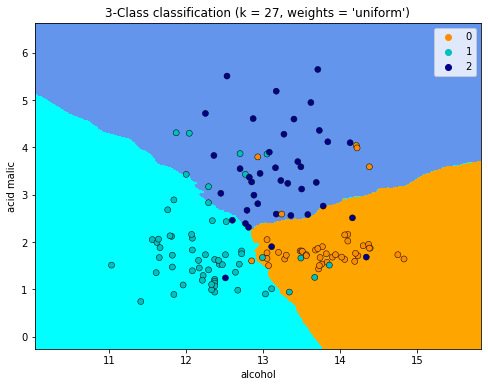

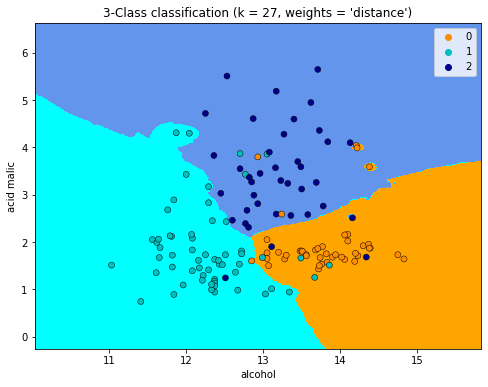

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 27
h = .02  # step size in the mesh
X = dataframe.iloc[:, :2].values
y = dataframe.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel('alcohol')
    plt.ylabel('acid malic')

plt.show()

* O dataset wine foi usado somente para exemplificar a aplicação do algoritmo de KNN. Cada conjunto de treinamento e teste produz um erro muito diferente dos erros encontrados em outros conjuntos aleatórios. Esse é um ponto de atenção para quando quisermos aplicar o algoritmo e analisar do melhor K em um dado real.